In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_axis = random.sample(range(0, 100000), 100)

In [3]:
X_axis

[40400,
 34707,
 98652,
 28690,
 80441,
 14521,
 81284,
 23856,
 58252,
 54391,
 7134,
 18767,
 96660,
 8624,
 58707,
 75205,
 72712,
 19821,
 59506,
 36788,
 57333,
 1337,
 1166,
 99677,
 68641,
 29355,
 41183,
 79538,
 53998,
 982,
 88812,
 27842,
 88653,
 72789,
 19674,
 40624,
 49724,
 44221,
 35820,
 32258,
 55892,
 96657,
 88216,
 75997,
 75412,
 39195,
 77369,
 15203,
 1373,
 9927,
 82572,
 46938,
 94487,
 9173,
 4155,
 54042,
 80020,
 5726,
 83113,
 94761,
 95310,
 79486,
 10477,
 80605,
 94120,
 37698,
 99091,
 84313,
 5870,
 12011,
 93097,
 15304,
 60070,
 73054,
 31404,
 90092,
 5148,
 96778,
 27990,
 44807,
 67068,
 32810,
 51009,
 30079,
 80923,
 75660,
 921,
 3294,
 68322,
 16799,
 8823,
 717,
 89117,
 60292,
 26185,
 84325,
 6156,
 14325,
 70899,
 69493]

In [4]:
X_axis = np.array(X_axis)

In [5]:
u = X_axis.mean()
std = X_axis.std()

In [6]:
X_axis = (X_axis - u)/std

In [7]:
Y_axis = []
for i in X_axis:
    Y_axis.append(2 * i + 100)

In [8]:
Y_axis

[99.4070392973962,
 99.05054211655911,
 103.05479509892818,
 98.67375596916816,
 101.91441741401266,
 97.78648940403895,
 101.96720629921303,
 98.37104959780571,
 100.5249363064079,
 100.28315945497421,
 97.32391349066401,
 98.05237505832216,
 102.93005552678214,
 97.417217688705,
 100.55342852795731,
 101.5865376952593,
 101.4304253692753,
 98.11837681988939,
 100.60346212140345,
 99.18085489248077,
 100.46738828090477,
 96.96090380204421,
 96.950195736363,
 103.11898087274832,
 101.17549826174188,
 98.71539844681732,
 99.45607096656806,
 101.8578713127838,
 100.25854968998756,
 96.93867360720894,
 102.43861167025493,
 98.62065398263209,
 102.42865504777942,
 101.43524712984521,
 98.10917164061958,
 99.42106623723592,
 99.9909106682244,
 99.64631133814422,
 99.12023847388771,
 98.89718508232936,
 100.37715247595374,
 102.92986766598071,
 102.40128999103854,
 101.63613294683543,
 101.5995000905576,
 99.33158187549058,
 101.7220479533537,
 97.82919642622952,
 96.9631581316613,
 97.49881

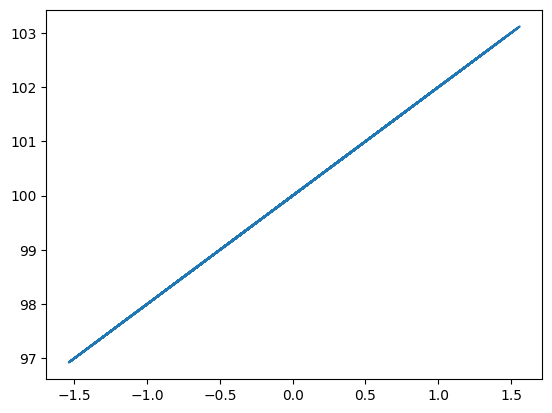

In [9]:
plt.plot(X_axis, Y_axis)

In [10]:
Y_axis = np.array(Y_axis)

In [11]:
X_train = X_axis[:80]
X_test = X_axis[80:]
Y_train = Y_axis[:80]
Y_test = Y_axis[80:]

In [12]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(80,) (20,) (20,) (80,)


In [13]:
def hypothesis(X, weight):
    pred = weight[0] + weight[1] * X
    return pred

In [14]:
def loss_function(X, Y, weight):
    loss = 0
    
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weight)
        y_t = Y[i]
        
        loss += (y_pred - y_t)**2
        
    return loss/X.shape[0]

In [15]:
def gradient(X, Y, weights):
    grad = np.zeros((2, ))
    for i in range(X.shape[0]):
        y_pred = hypothesis(X[i], weights)
        y_t = Y[i]
        
        grad[0] += (y_pred - y_t) * 1
        grad[1] += (y_pred - y_t) * X[i]
        
    return grad/X.shape[0]

In [16]:
# X = np.array([[1, 2, 3], 
#               [1, 2, 3], 
#               [1, 2, 3], 
#               [1, 2, 3]])

In [17]:
# np.array([1, 2, 3, 4, 5]).shape

In [18]:
def gradient_descent(X, Y):
    lr_rate = 0.3
    weight = np.zeros((2, ))
    
    loss_epoch = []
    epoch = 500
    
    for i in range(epoch):
        
        grad = gradient(X, Y, weight)
        
        weight[0] = weight[0] - lr_rate * grad[0]
        weight[1] = weight[1] - lr_rate * grad[1]
        
        loss = loss_function(X, Y, weight)
        loss_epoch.append(loss)
        
    return weight, loss_epoch

In [19]:
weight, cost = gradient_descent(X_train, Y_train)

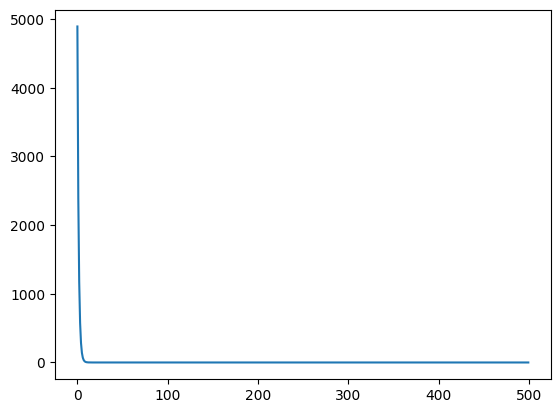

In [20]:
plt.plot(cost)

In [21]:
cost

[4893.551802046377,
 2393.7843825528334,
 1173.5662230375026,
 576.6162684400131,
 283.93160041659434,
 140.11187868767078,
 69.28729985595217,
 34.3343913578415,
 17.048199808678127,
 8.481541446805425,
 4.227556002360306,
 2.111015901898926,
 1.0559633490279992,
 0.5290879306596495,
 0.2655181428651624,
 0.1334483222042907,
 0.06716603860314266,
 0.03385083499600185,
 0.0170819668479776,
 0.008630216796934074,
 0.004365040523661016,
 0.002210070135689823,
 0.0011200687421924068,
 0.0005681657753194038,
 0.00028844931236403007,
 0.0001465553454760264,
 7.45155006688579e-05,
 3.791236670931836e-05,
 1.9301114930477736e-05,
 9.831740835833597e-06,
 5.010783226154256e-06,
 2.5549942017606527e-06,
 1.3033664183861162e-06,
 6.651503541644529e-07,
 3.395747112891788e-07,
 1.7342019283312102e-07,
 8.859320468706882e-08,
 4.5271631369624063e-08,
 2.31401580003237e-08,
 1.1830721429572151e-08,
 6.049952122737249e-09,
 3.094426982578398e-09,
 1.5830279946425454e-09,
 8.099721542231574e-10,
 4.1

In [22]:
weight

array([100.,   2.])

In [23]:
preds = weight[0] + weight[1] * 30

In [24]:
preds

160.00000000000003

In [27]:
y_p = []
for i in range(X_test.shape[0]):
    y_p.append(weight[0] + weight[1] * X_test[i])
    print(weight[0] + weight[1] * X_test[i], Y_test[i])

101.07699658152815 101.07699658152816
98.93175146979151 98.93175146979152
100.07137771150133 100.07137771150134
98.76073552022781 98.76073552022784
101.9446003827749 101.94460038277491
101.61502991680871 101.61502991680871
96.93485377091329 96.9348537709133
97.08345166484028 97.08345166484031
101.15552239652371 101.15552239652372
97.92913837258749 97.9291383725875
97.42967912186614 97.42967912186616
96.92207923641641 96.92207923641642
102.4577108517331 102.45771085173311
100.65268165137672 100.65268165137674
98.51689219997846 98.51689219997847
102.15763453159059 102.1576345315906
97.26267086939953 97.26267086939954
97.77421583167919 97.7742158316792
101.31689482494758 101.3168948249476
101.2288507293465 101.22885072934652


In [28]:
def R2_score(y_t, y_p):
    numerator = np.sum((y_t - y_p)**2)
    denominator = np.sum((y_t - y_t.mean())**2)
    
    return 1 - (numerator/denominator)

In [29]:
R2_score(Y_test, y_p)

1.0

In [39]:
w0 = np.arange(-1000, 1000)
w1 = np.arange(-1000, 1000)
w0, w1 = np.meshgrid(w0, w1)

In [40]:
J = np.zeros(w0.shape)

In [41]:
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        y_pred = w0[i, j] + w1[i, j] * X_test
        J[i, j] = np.mean((y_pred - Y_test)**2)

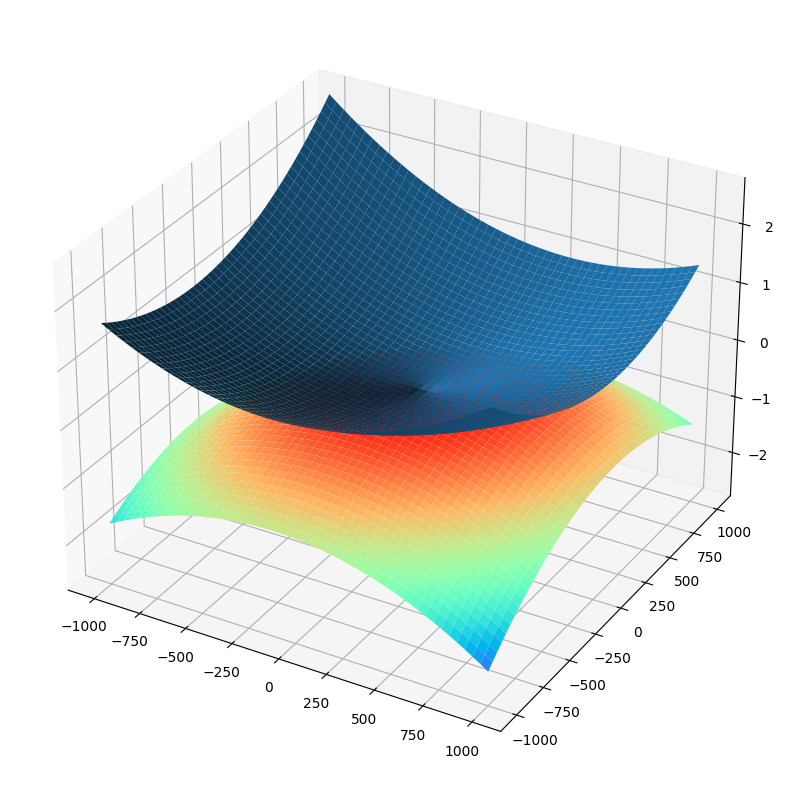

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w0, w1, J)
ax.plot_surface(w0, w1, -J, cmap = 'rainbow')
plt.show()

In [60]:
import matplotlib
matplotlib.projections.get_projection_names()

['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']